# Retail Transactions – Exploratory Data Analysis (EDA)

## Objective
The dataset was previously cleaned and standardized using SQL.
This notebook focuses on:
- Data profiling
- Statistical analysis
- Outlier detection
- Business sanity checks
to validate data quality before visualization in Power BI.

## Data Source Note

The dataset was cleaned and transformed in SQL Server.
For exploratory data analysis in Python, a snapshot of the cleaned table
was exported to CSV to simplify local analysis.
SQL remains the source of truth for data transformations.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Temp/CoffeeSales/cleaned_coffee_sales.csv")
df.head()

,TransactionID,Item,Quantity,PricePerUnit,TotalSpent,PaymentMethod,Location,TransactionDate
0,TXN_1000555,Tea,1,1.5,1.5,Credit Card,In-store,19/10/2023
1,TXN_1001832,Salad,2,5,10,Cash,Takeaway,Unknown
2,TXN_1002457,Cookie,5,1,5,Digital Wallet,Takeaway,29/09/2023
3,TXN_1003246,Juice,2,3,6,Unknown,Unknown,15/02/2023
4,TXN_1004184,Smoothie,1,4,4,Credit Card,In-store,18/05/2023


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    10000 non-null  object
 1   Item             10000 non-null  object
 2   Quantity         10000 non-null  object
 3   PricePerUnit     10000 non-null  object
 4   TotalSpent       10000 non-null  object
 5   PaymentMethod    10000 non-null  object
 6   Location         10000 non-null  object
 7   TransactionDate  10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


(10000, 8)

In [4]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['PricePerUnit'] = pd.to_numeric(df['PricePerUnit'], errors='coerce')
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

In [5]:
df['TransactionDate'] = pd.to_datetime(
    df['TransactionDate'],
    format='%d/%m/%Y',
    errors='coerce'
)

Data Profiling

In [6]:
df.describe()

,Quantity,PricePerUnit,TotalSpent
count,9962.000000,9962.000000,9960.000000
mean,3.025597,2.947902,8.930924
std,1.420181,1.279759,6.004475
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,9962.0,3.025597,1.420181,1.0,2.0,3.0,4.0,5.0
PricePerUnit,9962.0,2.947902,1.279759,1.0,2.0,3.0,4.0,5.0
TotalSpent,9960.0,8.930924,6.004475,1.0,4.0,8.0,12.0,25.0


In [8]:
print(df.isnull().sum())

TransactionID        0
Item                 0
Quantity            38
PricePerUnit        38
TotalSpent          40
PaymentMethod        0
Location             0
TransactionDate    460
dtype: int64


In [9]:
df.isnull().mean().sort_values(ascending=False)

TransactionDate    0.0460
TotalSpent         0.0040
Quantity           0.0038
PricePerUnit       0.0038
TransactionID      0.0000
Item               0.0000
PaymentMethod      0.0000
Location           0.0000
dtype: float64

In [10]:
df['Location'].value_counts()

Unknown     3961
Takeaway    3022
In-store    3017
Name: Location, dtype: int64

In [11]:
df['PaymentMethod'].value_counts()

Unknown           3178
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: PaymentMethod, dtype: int64

In [12]:
df['Item'].value_counts()

Coffee      1291
Salad       1272
Cookie      1213
Tea         1207
Juice       1171
Cake        1139
Sandwich    1131
Smoothie    1096
Unknown      480
Name: Item, dtype: int64

Data Quality & Business Rules Checks

In [13]:
# Check mismatches between TotalSpent and Quantity * PricePerUnit
df['calculated_total'] = df['Quantity'] * df['PricePerUnit']
df['difference'] = df['TotalSpent'] - df['calculated_total']

df[df['difference'].abs() > 0.01]

,TransactionID,Item,Quantity,PricePerUnit,TotalSpent,PaymentMethod,Location,TransactionDate,calculated_total,difference


Outlier Detection

In [14]:
Q1 = df['TotalSpent'].quantile(0.25)
Q3 = df['TotalSpent'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['TotalSpent'] < Q1 - 1.5 * IQR) |
    (df['TotalSpent'] > Q3 + 1.5 * IQR)
]

outliers

,TransactionID,Item,Quantity,PricePerUnit,TotalSpent,PaymentMethod,Location,TransactionDate,calculated_total,difference
36,TXN_1037486,Salad,5.0,5.0,25.0,Digital Wallet,In-store,NaT,25.0,0.0
116,TXN_1122699,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-10-14,25.0,0.0
117,TXN_1122700,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-11-09,25.0,0.0
171,TXN_1183995,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-28,25.0,0.0
204,TXN_1205773,Salad,5.0,5.0,25.0,Cash,Unknown,2023-01-27,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9535,TXN_9579984,Salad,5.0,5.0,25.0,Credit Card,Unknown,2023-12-25,25.0,0.0
9650,TXN_9681369,Salad,5.0,5.0,25.0,Unknown,Unknown,2023-10-23,25.0,0.0
9699,TXN_9719921,Salad,5.0,5.0,25.0,Credit Card,Unknown,2023-07-28,25.0,0.0
9816,TXN_9837568,Salad,5.0,5.0,25.0,Cash,In-store,2023-04-17,25.0,0.0


<Axes: >

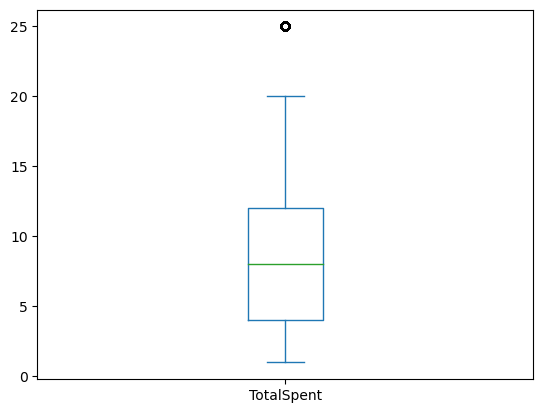

In [15]:
df['TotalSpent'].plot(kind='box')

In [16]:
item_stats = df.groupby('Item').agg(
    avg_price=('PricePerUnit', 'mean'),
    min_price=('PricePerUnit', 'min'),
    max_price=('PricePerUnit', 'max'),
    total_revenue=('TotalSpent', 'sum'),
    transactions=('TransactionID', 'count')
)

item_stats

,avg_price,min_price,max_price,total_revenue,transactions
Item,,,,,
Cake,3.000000,3.0,3.0,10395.0,1139
Coffee,2.000000,2.0,2.0,7798.0,1291
Cookie,1.000000,1.0,1.0,3589.0,1213
Juice,3.000000,3.0,3.0,10509.0,1171
Salad,5.000000,5.0,5.0,19070.0,1272
Sandwich,4.000000,4.0,4.0,13664.0,1131
Smoothie,4.000000,4.0,4.0,13320.0,1096
Tea,1.500000,1.5,1.5,5466.0,1207
Unknown,3.478903,3.0,4.0,5141.0,480


In [17]:
monthly_revenue = (
    df
    .groupby(df['TransactionDate'].dt.to_period('M'))['TotalSpent']
    .sum()
)

monthly_revenue

TransactionDate
2023-01    7242.0
2023-02    6633.5
2023-03    7214.5
2023-04    7168.0
2023-05    6941.5
2023-06    7350.0
2023-07    6877.5
2023-08    7077.5
2023-09    6846.0
2023-10    7302.0
2023-11    6957.0
2023-12    7177.0
Freq: M, Name: TotalSpent, dtype: float64

In [18]:
print(df['Item'].unique())

['Tea' 'Salad' 'Cookie' 'Juice' 'Smoothie' 'Coffee' 'Cake' 'Unknown'
 'Sandwich']


In [19]:
print(df['PaymentMethod'].unique())

['Credit Card' 'Cash' 'Digital Wallet' 'Unknown']


In [20]:
print(df['Location'].unique())

['In-store' 'Takeaway' 'Unknown']


In [21]:
print(df.dtypes)

TransactionID               object
Item                        object
Quantity                   float64
PricePerUnit               float64
TotalSpent                 float64
PaymentMethod               object
Location                    object
TransactionDate     datetime64[ns]
calculated_total           float64
difference                 float64
dtype: object


In [22]:
print(df.describe())

          Quantity  PricePerUnit   TotalSpent  calculated_total  difference
count  9962.000000   9962.000000  9960.000000       9942.000000      9942.0
mean      3.025597      2.947902     8.930924          8.931855         0.0
std       1.420181      1.279759     6.004475          6.002356         0.0
min       1.000000      1.000000     1.000000          1.000000         0.0
25%       2.000000      2.000000     4.000000          4.000000         0.0
50%       3.000000      3.000000     8.000000          8.000000         0.0
75%       4.000000      4.000000    12.000000         12.000000         0.0
max       5.000000      5.000000    25.000000         25.000000         0.0


## Key Findings

- TotalSpent is consistent with Quantity × PricePerUnit after SQL cleaning
- Outliers were detected in high-value transactions, likely bulk purchases
- Prices are consistent per item with low variance
- No abnormal negative or zero quantities found

Do a small number of items or companies generate most of the revenue?

In [23]:
item_revenue = (
    df.groupby('Item')['TotalSpent']
      .sum()
      .sort_values(ascending=False)
)

cum_pct = item_revenue.cumsum() / item_revenue.sum()
pd.DataFrame({
    'Revenue': item_revenue,
    'CumulativePct': cum_pct
})

,Revenue,CumulativePct
Item,,
Salad,19070.0,0.214385
Sandwich,13664.0,0.367996
Smoothie,13320.0,0.517740
Juice,10509.0,0.635882
Cake,10395.0,0.752743
Coffee,7798.0,0.840408
Tea,5466.0,0.901857
Unknown,5141.0,0.959652
Cookie,3589.0,1.000000


Typical transaction size?

In [24]:
df['TotalSpent'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9960.000000
mean        8.930924
std         6.004475
min         1.000000
50%         8.000000
75%        12.000000
90%        20.000000
95%        20.000000
99%        25.000000
max        25.000000
Name: TotalSpent, dtype: float64

Volatility Over Time

In [25]:
daily_revenue = (
    df.groupby('TransactionDate')['TotalSpent']
      .sum()
)

daily_revenue.std()
daily_revenue.mean()

232.2917808219178

<Axes: xlabel='TransactionDate'>

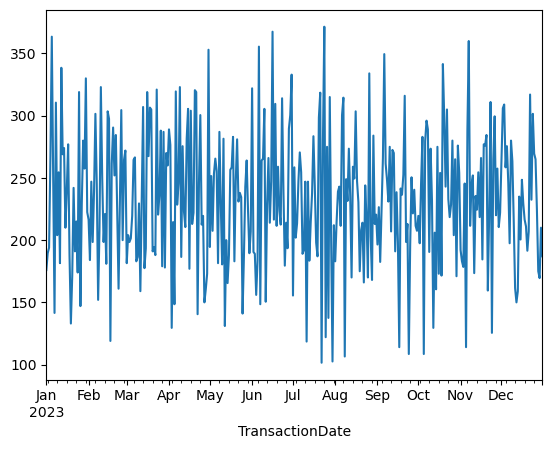

In [26]:
daily_revenue.plot()

Item Price Stability

In [27]:
price_stability = (
    df.groupby('Item')['PricePerUnit']
      .agg(['mean', 'std', 'min', 'max'])
)

price_stability


,mean,std,min,max
Item,,,,
Cake,3.000000,0.000000,3.0,3.0
Coffee,2.000000,0.000000,2.0,2.0
Cookie,1.000000,0.000000,1.0,1.0
Juice,3.000000,0.000000,3.0,3.0
Salad,5.000000,0.000000,5.0,5.0
Sandwich,4.000000,0.000000,4.0,4.0
Smoothie,4.000000,0.000000,4.0,4.0
Tea,1.500000,0.000000,1.5,1.5
Unknown,3.478903,0.500083,3.0,4.0


Data Completeness Report

In [28]:
completeness = pd.DataFrame({
    'MissingPct': df.isnull().mean()
}).sort_values(by='MissingPct', ascending=False)

completeness

,MissingPct
TransactionDate,0.0460
calculated_total,0.0058
difference,0.0058
TotalSpent,0.0040
Quantity,0.0038
PricePerUnit,0.0038
TransactionID,0.0000
Item,0.0000
PaymentMethod,0.0000
Location,0.0000


How many transactions occur per day and per month?

In [29]:
transactions_per_day = (
    df.groupby('TransactionDate')
      .size()
      .rename('transactions')
)

transactions_per_day.head()

TransactionDate
2023-01-01    20
2023-01-02    21
2023-01-03    21
2023-01-04    27
2023-01-05    38
Name: transactions, dtype: int64

In [31]:
transactions_per_month = (
    df.groupby(df['TransactionDate'].dt.to_period('M'))
      .size()
      .rename('transactions')
)

transactions_per_month.head()

TransactionDate
2023-01    818
2023-02    727
2023-03    827
2023-04    774
2023-05    777
Freq: M, Name: transactions, dtype: int64

What is the total revenue over time?

In [32]:
daily_revenue = (
    df.groupby('TransactionDate')['TotalSpent']
      .sum()
)

daily_revenue.head()

TransactionDate
2023-01-01    176.0
2023-01-02    189.5
2023-01-03    194.0
2023-01-04    267.5
2023-01-05    363.5
Name: TotalSpent, dtype: float64

In [ ]:
monthly_revenue = (
    df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalSpent']
      .sum()
)

monthly_revenue.head()

TransactionDate
2023-01    7242.0
2023-02    6633.5
2023-03    7214.5
2023-04    7168.0
2023-05    6941.5
Freq: M, Name: TotalSpent, dtype: float64

<Axes: title={'center': 'Monthly Revenue'}, xlabel='TransactionDate'>

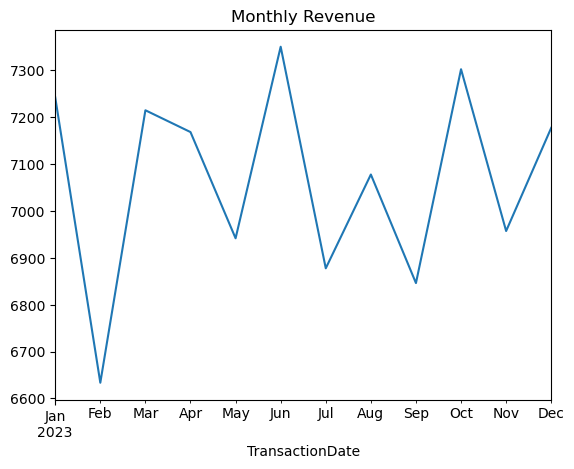

In [34]:
monthly_revenue.plot(title='Monthly Revenue')

What are the average transaction values?

In [35]:
avg_transaction_value = df['TotalSpent'].mean()
avg_transaction_value

8.930923694779116

In [36]:
avg_transaction_by_month = (
    df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalSpent']
      .mean()
)

avg_transaction_by_month

TransactionDate
2023-01    8.896806
2023-02    9.162293
2023-03    8.744848
2023-04    9.321196
2023-05    9.003243
2023-06    9.007353
2023-07    8.716730
2023-08    8.846875
2023-09    8.732143
2023-10    8.734450
2023-11    8.896419
2023-12    9.073325
Freq: M, Name: TotalSpent, dtype: float64

Are there unusual spikes or anomalies in sales?

In [37]:
mean_rev = daily_revenue.mean()
std_rev = daily_revenue.std()

threshold = mean_rev + 3 * std_rev

anomalies = daily_revenue[daily_revenue > threshold]
anomalies

Series([], Name: TotalSpent, dtype: float64)

<Axes: title={'center': 'Daily Revenue with Anomalies'}, xlabel='TransactionDate'>

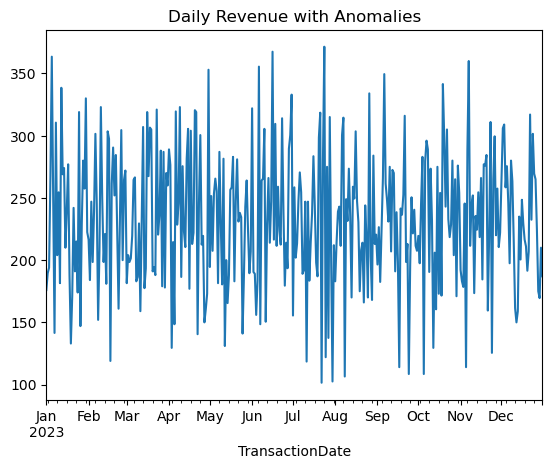

In [38]:
daily_revenue.plot(title='Daily Revenue with Anomalies')

Which products generate the most revenue?

In [39]:
revenue_by_item = (
    df.groupby('Item')['TotalSpent']
      .sum()
      .sort_values(ascending=False)
)

revenue_by_item

Item
Salad       19070.0
Sandwich    13664.0
Smoothie    13320.0
Juice       10509.0
Cake        10395.0
Coffee       7798.0
Tea          5466.0
Unknown      5141.0
Cookie       3589.0
Name: TotalSpent, dtype: float64

In [40]:
revenue_by_item.head(5)

Item
Salad       19070.0
Sandwich    13664.0
Smoothie    13320.0
Juice       10509.0
Cake        10395.0
Name: TotalSpent, dtype: float64

In [41]:
(revenue_by_item.cumsum() / revenue_by_item.sum()).head(10)

Item
Salad       0.214385
Sandwich    0.367996
Smoothie    0.517740
Juice       0.635882
Cake        0.752743
Coffee      0.840408
Tea         0.901857
Unknown     0.959652
Cookie      1.000000
Name: TotalSpent, dtype: float64

## Business Questions Answered Using Python

1. Transaction volume was analyzed at daily and monthly levels.
2. Revenue trends over time were identified using time-based aggregation.
3. Average transaction values were calculated to assess customer spending behavior.
4. Statistical thresholds were applied to detect anomalous sales spikes.
5. Revenue contribution was analyzed by product to identify key drivers.